In [1]:
import pandas as pd
import seaborn as sns

In [15]:
digits = pd.read_csv("../data/mnist.csv")
digits.shape

(208, 6)

<Axes: xlabel='true_label', ylabel='Count'>

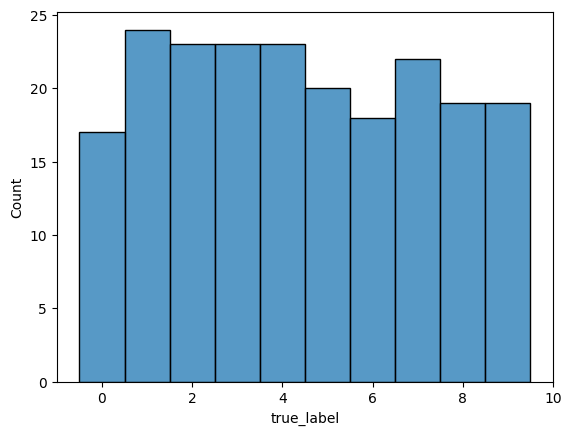

In [16]:
sns.histplot(digits, x="true_label", discrete=True)

## September

In [19]:
# get confidence distribution
sept = digits[digits["timestamp"].str[:2] == "09"]
sept

,timestamp,img_path,prediction,true_label,confidence,corrected
0,09/04/2025,./images/image0.png,7,4,0.794120,True
1,09/04/2025,./images/image1.png,2,2,0.872318,True
2,09/10/2025,./images/image2.png,2,1,0.443951,True
3,09/10/2025,./images/image3.png,1,1,0.893086,True
4,09/10/2025,./images/image4.png,1,1,0.815207,True
...,...,...,...,...,...,...
138,09/26/2025,./images/image138.png,2,2,0.965632,True
139,09/26/2025,./images/image139.png,2,2,0.967661,True
140,09/26/2025,./images/image140.png,2,2,0.960994,True
141,09/26/2025,./images/image141.png,3,3,0.392909,True


<Axes: xlabel='confidence', ylabel='Density'>

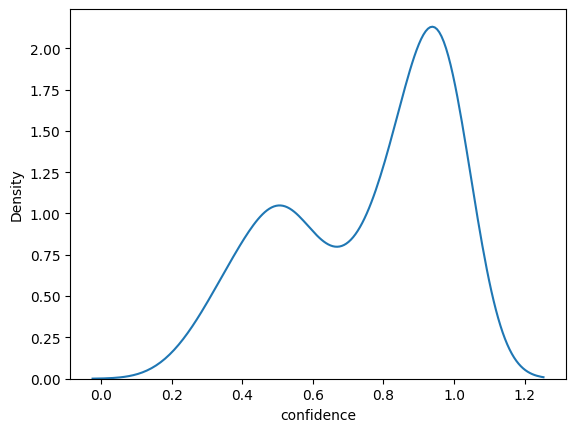

In [21]:
sns.kdeplot(sept, x="confidence")

In [ ]:
# dimensionality reduction preprocessing
import numpy as np
from PIL import Image

def load_image_as_vector(path):
    path = f".{path}"
    img = Image.open(path).convert("L")  # grayscale
    img = img.resize((28, 28))
    arr = np.array(img).flatten() / 255.0  # normalize
    return arr

# create matrix of image vectors
image_vectors = np.stack([load_image_as_vector(p) for p in digits["img_path"]])
print(image_vectors.shape)  # (n_samples, 784)


# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_vectors)

digits["pca1"] = pca_result[:, 0]
digits["pca2"] = pca_result[:, 1]

# TSNE analysis
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(image_vectors)

digits["tsne1"] = tsne_result[:, 0]
digits["tsne2"] = tsne_result[:, 1]




(208, 784)


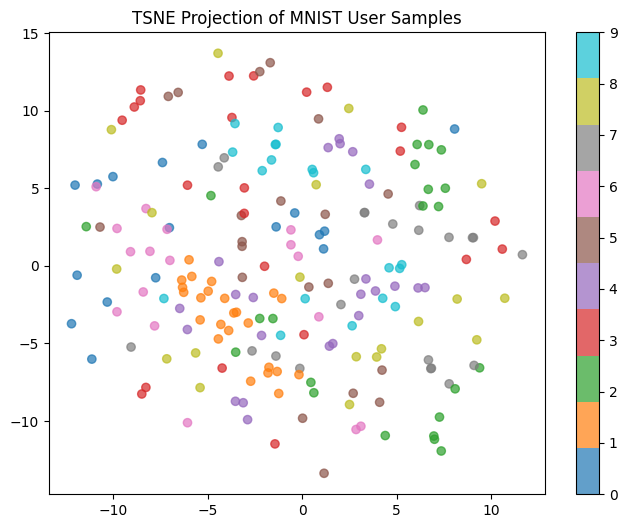

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(digits["tsne1"], digits["tsne2"], c=digits["true_label"], cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("TSNE Projection of MNIST User Samples")
plt.show()
